# <font color=red>DATA ANALYSIS</font>

In the previous notebooks, we have built a dataframe containing a total of 404.781 music releases and their author's origin, as well as their main music genre.

The purpose of this notebook is to simply analyze and explore the dataframe and see if there is any relevant insight before feeding it to our visualization tool (in this case, Tableau Public).

Data cleansing has been partially done already in the previous notebooks (formatting artists names, normalizing music genres, removing rows with no values, etc).

In [57]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder 

## 1) General analysis

In [22]:
df = pd.read_csv('Data_out/Final_dataframe.csv', sep='\t', header=0, encoding='utf-8')
df.head()

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Main_genre,area_id,area_name,artist_id,artist_mbid,artist_name,country_name,credit_id,group_id,latitude,longitude,release_group,release_id,release_year,subdivision_name,subgenre,count,Year
0,Electronic,NaN,Bristol,4.0,10adbe5e-a2c0-4bf3-8249-2b4cbf6e6ca8,Massive Attack,United Kingdom,4,4,52.355518,-1.174320,Blue Lines,7716,1991-01-01,England,NaN,1,1991
1,Rock,NaN,Tucson,12.0,249eb550-505e-43ef-ac50-e8c605706ff1,Giant Sand,United States,12,12,34.048928,-111.093731,Chore of Enchantment,10018,2000-01-01,Arizona,NaN,1,2000
2,Jazz,NaN,Chapel Hill,11.0,31810c40-932a-4f2d-8cfd-17849844e2a6,Squirrel Nut Zippers,United States,11,13,35.759573,-79.019300,The Inevitable,63822,1995-01-01,North Carolina,NaN,1,1995
3,Electronic,NaN,London,20.0,be899560-1570-402e-9f95-3182898a8b70,Art of Noise,United Kingdom,20,21,52.355518,-1.174320,"The Best of the Art of Noise: Art Works 12""",63500,1988-01-01,England,NaN,1,1988
4,Rock,NaN,Los Angeles,38.0,1dcc8968-f2cd-441c-beda-6270f70f2863,Hole,United States,38,50,36.778261,-119.417932,Live Through This,1292635,1994-01-01,California,NaN,1,1994


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404781 entries, 0 to 404780
Data columns (total 18 columns):
Main_genre          404781 non-null object
area_id             28041 non-null float64
area_name           391903 non-null object
artist_id           404781 non-null float64
artist_mbid         370261 non-null object
artist_name         404781 non-null object
country_name        404781 non-null object
credit_id           404781 non-null int64
group_id            404781 non-null int64
latitude            404781 non-null float64
longitude           404781 non-null float64
release_group       404781 non-null object
release_id          404781 non-null int64
release_year        404781 non-null object
subdivision_name    398275 non-null object
subgenre            51910 non-null object
count               404781 non-null int64
Year                404781 non-null int64
dtypes: float64(4), int64(5), object(9)
memory usage: 55.6+ MB


In [24]:
#If we group by Main genre:
genre_grouped = pd.pivot_table(df,values='count',\
                                index=['Main_genre'], aggfunc=np.sum)
genre_grouped.reset_index(level=['Main_genre'], inplace=True)
genre_grouped.head()

,Main_genre,count
0,Blues,8577
1,Classical,29966
2,Country,11050
3,Electronic,59295
4,Folk,11045


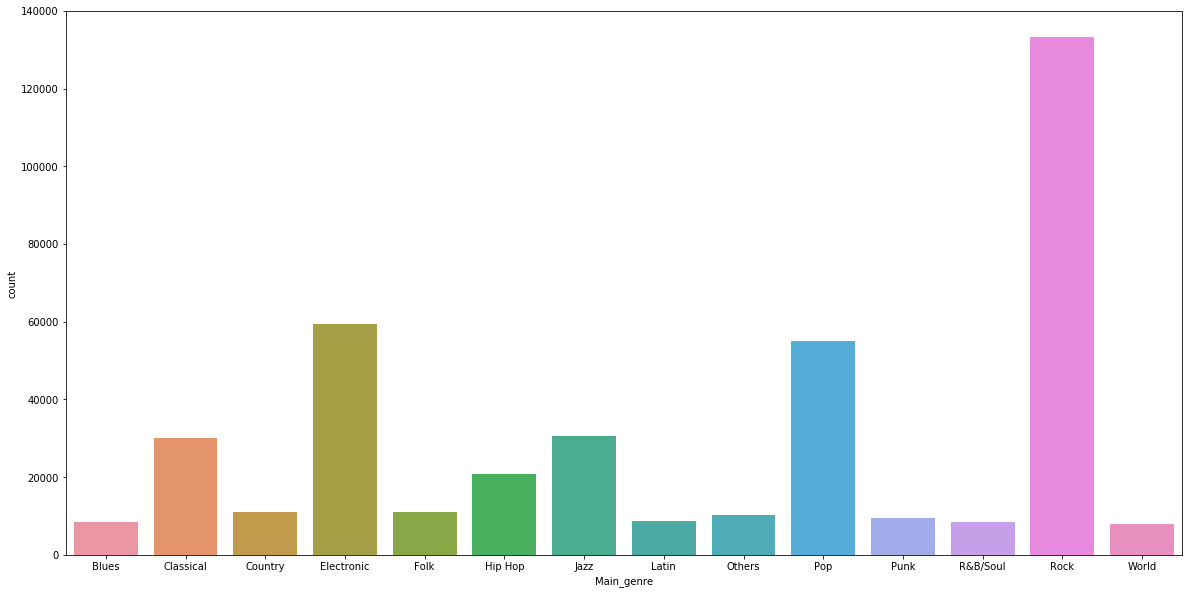

In [25]:
#Let's visualize how many releases we have for each genre:
plt.figure(figsize=(20,10))
sns.barplot(x=genre_grouped['Main_genre'], y=genre_grouped['count'])

We can see that Rock is the top category/Main genre, followed by Electronic and Pop. This result seems to me quite accurate, if we think that the releases we are taking into consideration are only recorded music.

The raising of recorded music was around 1948 (when the first Record/LP was issued), which is also the same period Rock music started. Before that, recorded music was not very common.

Let's analyze now the evolution of the different genres in time:

In [26]:
#We group by year and Main genre:
year_grouped = pd.pivot_table(df,values='count',\
                                index=['Year','Main_genre'], aggfunc=np.sum)
year_grouped.reset_index(level=['Year','Main_genre'], inplace=True)

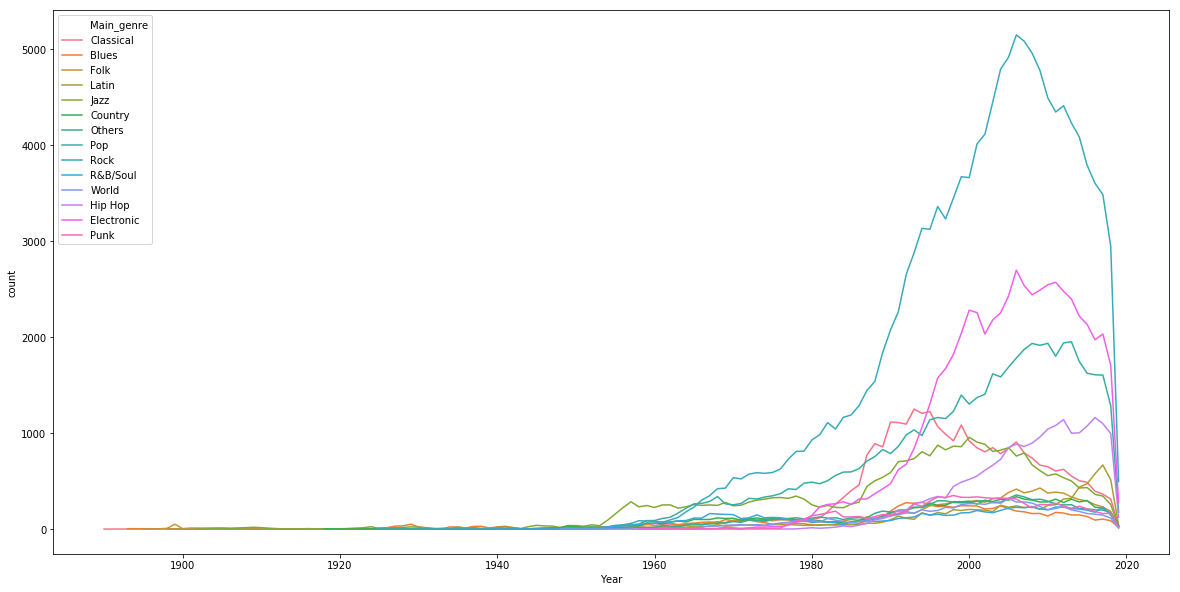

In [27]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=year_grouped['Year'], \
                  y=year_grouped['count'], hue=year_grouped['Main_genre'])

It seems that the evolution is quite similar for the majority of genres, and that there is quite a negative trend from the mid-2000's: this could be caused by the replacement of CD's by mp3 and streaming. 

I will add more detail about the chronological events related to the different formats of recorded music in the final visualization product in Tableau, as some of the changes in the trend could be linked to that.

Also, it's very likely that Musicbrainz's database isn't up-to-date for the latest releases, so we probably lack of all the information.

Let's have a look now and see how the releases are divided by country:

In [28]:
#We group by country:
country_grouped = pd.pivot_table(df,values='count',\
                                index=['country_name'], aggfunc=np.sum)
country_grouped.reset_index(level=['country_name'], inplace=True)

In [29]:
#As we have many countries, we want to see only the first 20 producers:
country_grouped.sort_values(by='count', ascending=False, inplace=True)
top_20 = country_grouped.head(20)

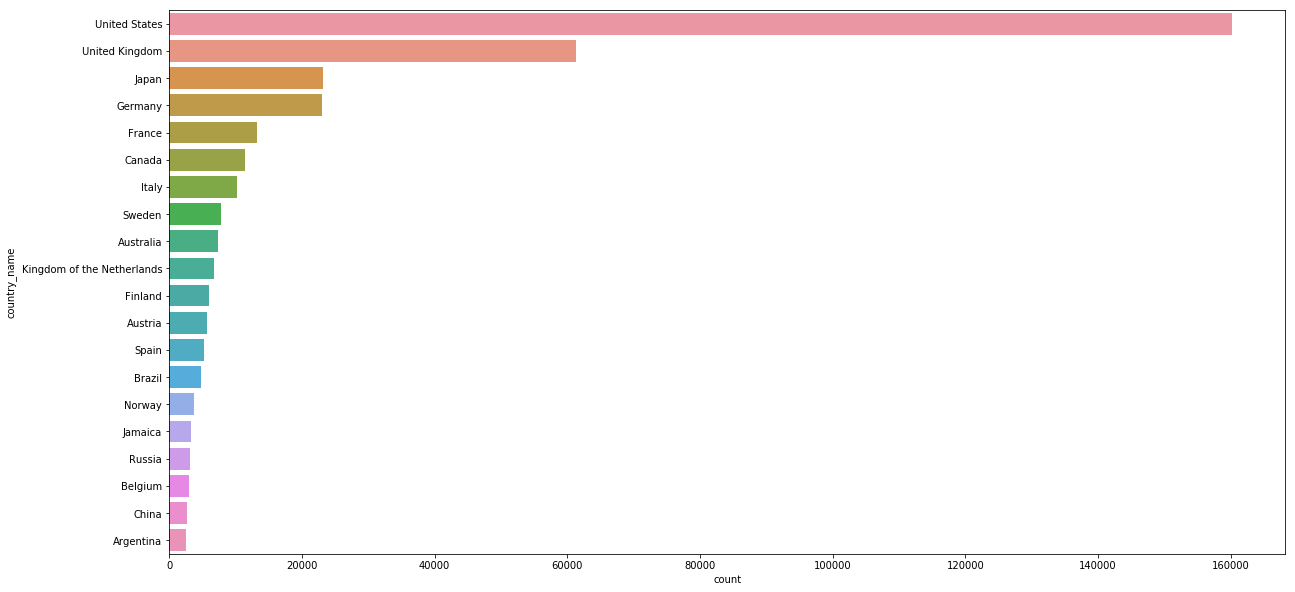

In [30]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='count', y='country_name', data=top_20)

The above results are not surprising, as the majority of the popular bands or artists are from the USA or UK.

Also, Musicbraiz is part of the NGO MetaBrainz, which is based in the USA. It's therefore logical that most of their records are related to american or british artists/bands.

In [31]:
#If we want to see the predominant genres by country:
countries = pd.pivot_table(df,values='count',\
                                index=['country_name',\
                                       'Main_genre'], \
                           aggfunc=np.sum)
countries.reset_index(level=['country_name', \
                               'Main_genre'], inplace=True)

In [32]:
#We change rows to columns:
pivot = countries.pivot('country_name', 'Main_genre', 'count')
pivot.replace(np.nan, 0, inplace=True) #replace nans for easier calculations

In [33]:
#We normalize each row to a percentage:
norm = pivot.div(pivot.sum(axis=1), axis=0)

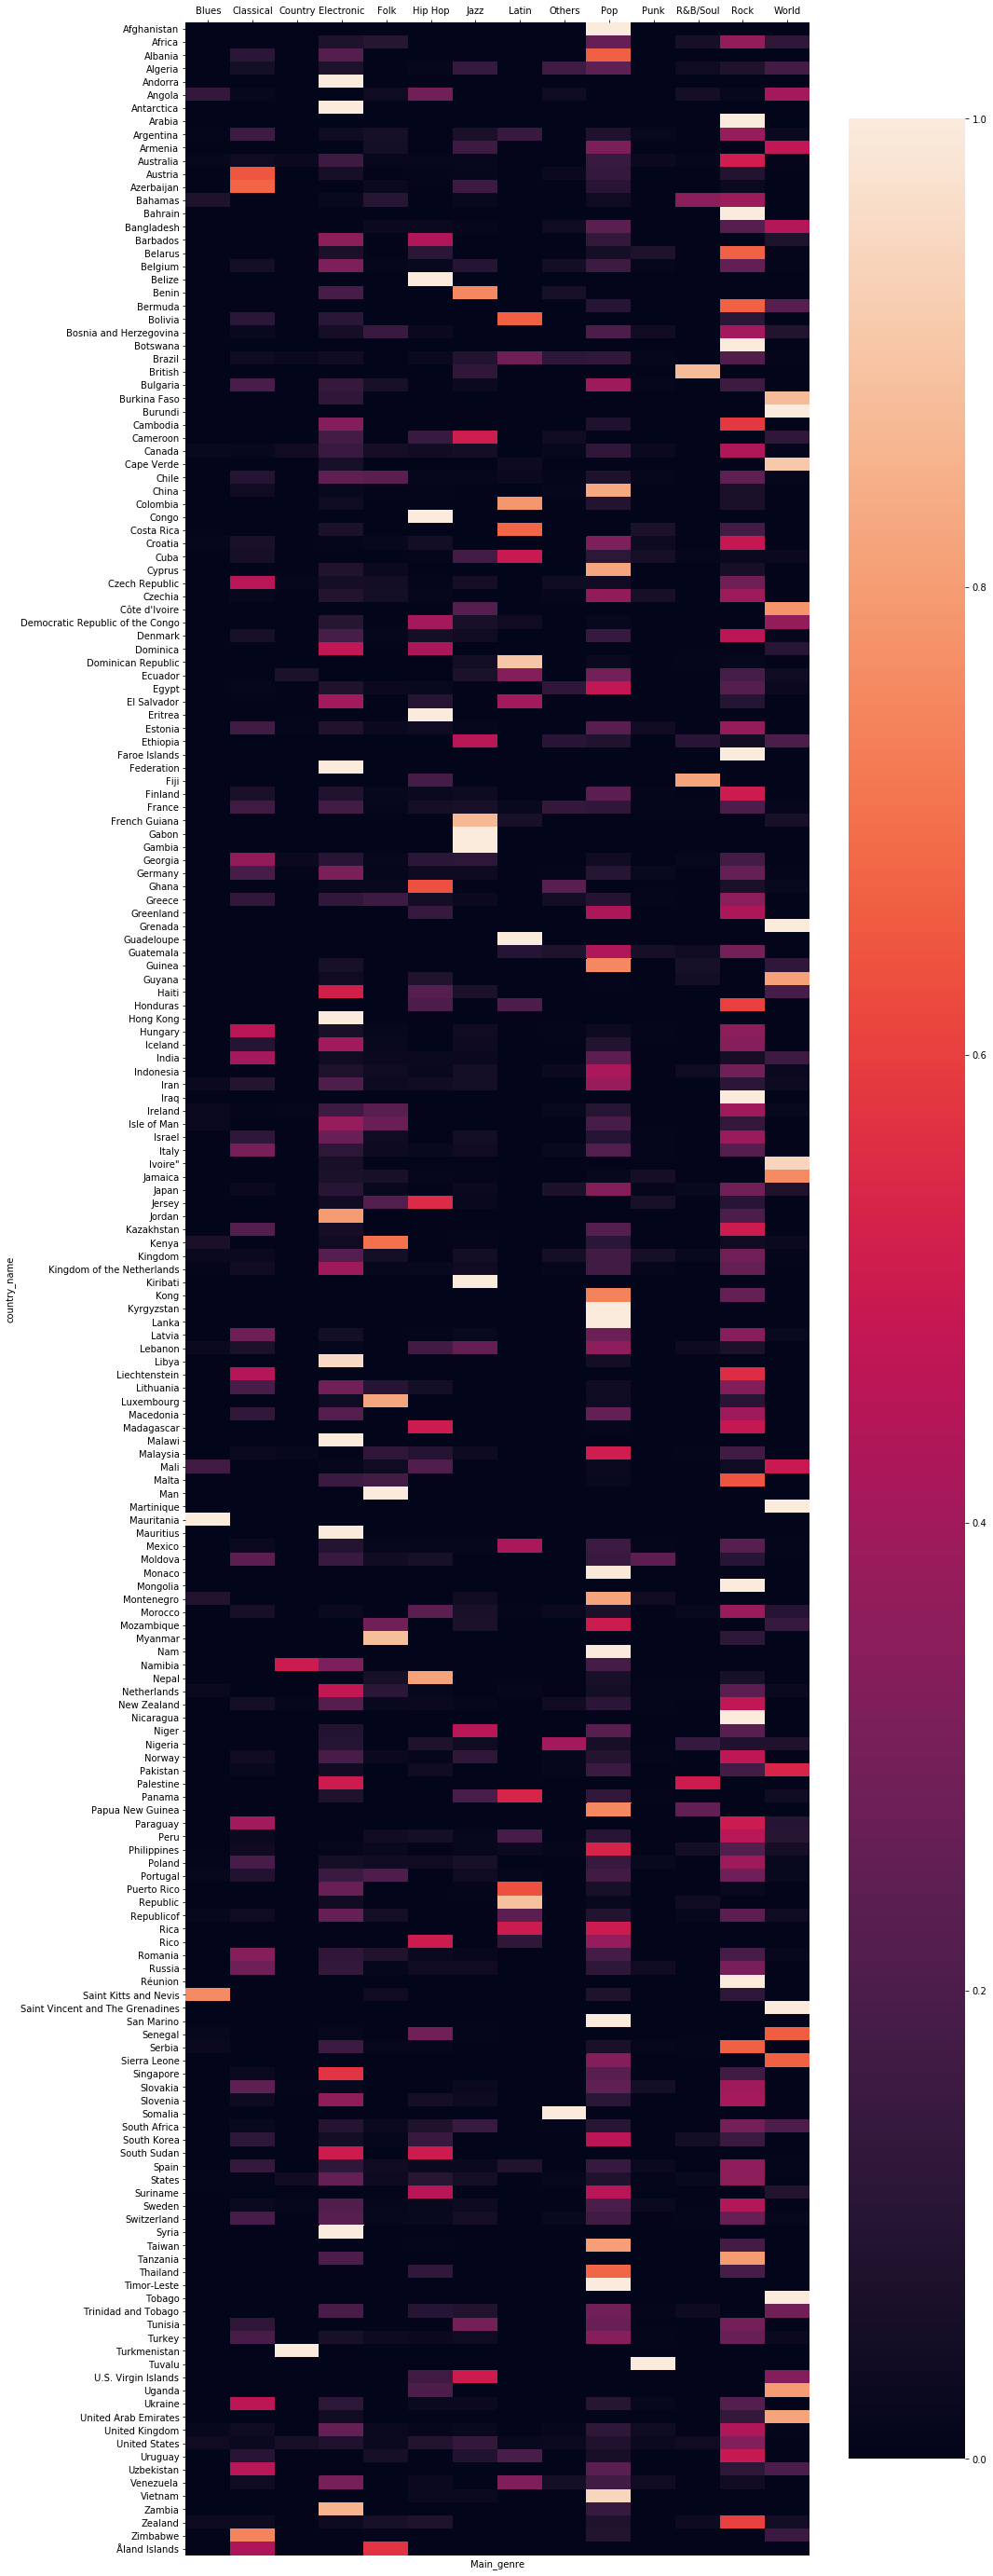

In [34]:
#And we draw a heatmap to see the predominant genres by country:
plt.figure(figsize=(15,50))

ax = sns.heatmap(norm, cbar=True)
ax.xaxis.set_ticks_position('top')

In the above heatmap we can see, for each country, the music genre they produce and its percentage of the countrie's total production.

Now, if we want to see which are the countries that produce the most of each genre, we can use the same type of graph, normalizing by column instead:

In [35]:
#We normalize each row to a percentage of the column:
norm_2 = pivot.div(pivot.sum(axis=0), axis=1).sort_values(by='Rock', ascending=False)

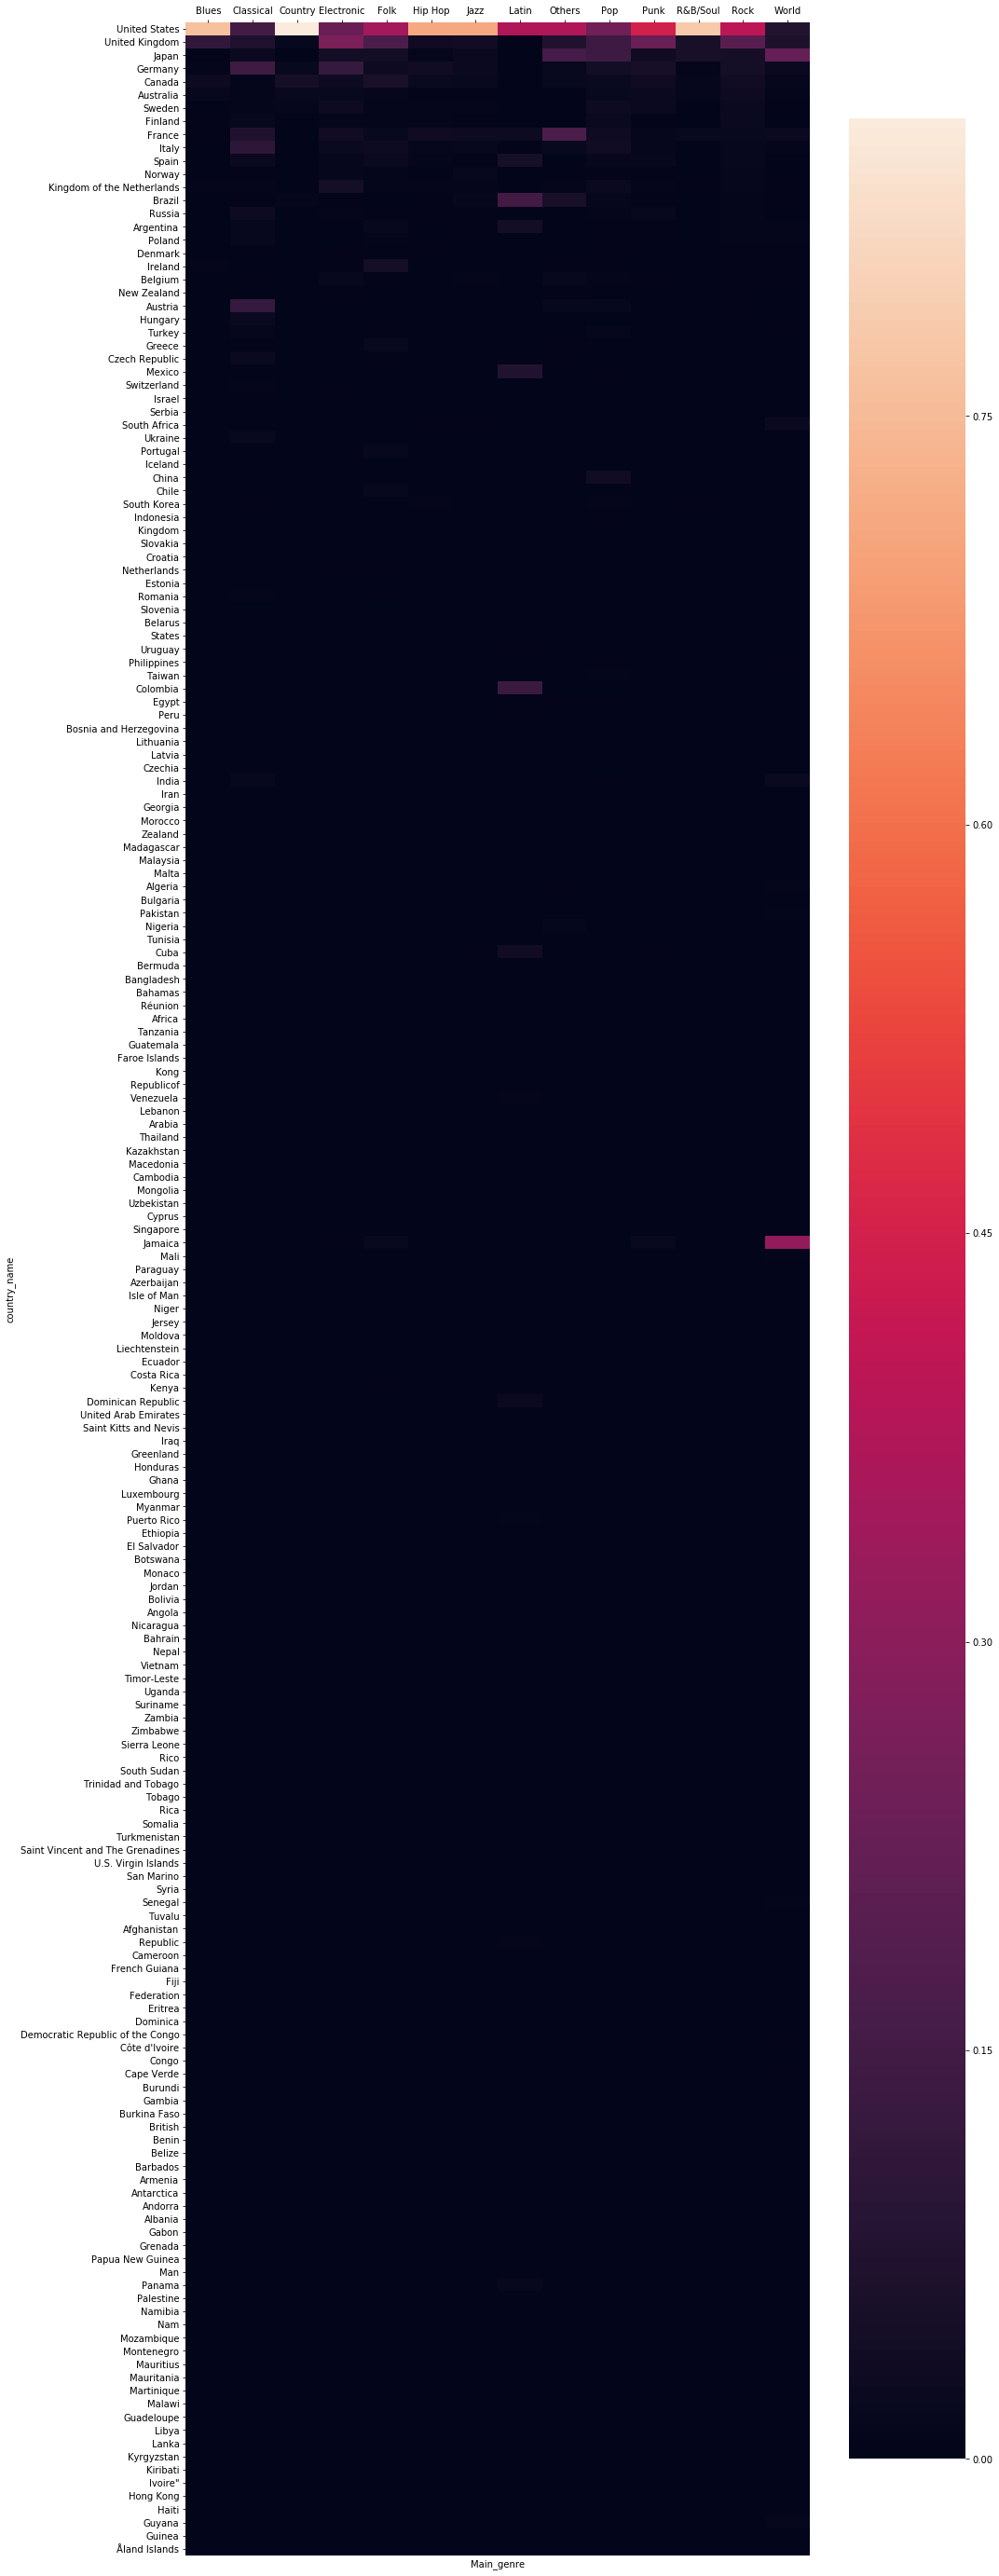

In [36]:
#And we draw a heatmap to see the top producers by genre:
plt.figure(figsize=(15,50))

ax = sns.heatmap(norm_2, cbar=True)
ax.xaxis.set_ticks_position('top')

Here we can clearly see again that the top producers for all the genres are only a few countries, while the rest doesn't have much impact in the total. There is an exception: Jamaica. Jamaica is the top producer of the category named "World", because the tags related to Reggae were classified into that category.

## 2) Data formatting and cleansing:

What we will do now is to see what type of information we have in our dataframe, format it if necessary and drop the columns that won't be useful for the visualization.


In [37]:
df.columns

Index(['Main_genre', 'area_id', 'area_name', 'artist_id', 'artist_mbid',
       'artist_name', 'country_name', 'credit_id', 'group_id', 'latitude',
       'longitude', 'release_group', 'release_id', 'release_year',
       'subdivision_name', 'subgenre', 'count', 'Year'],
      dtype='object')

In [38]:
df.isnull().sum(axis=0)

Main_genre               0
area_id             376740
area_name            12878
artist_id                0
artist_mbid          34520
artist_name              0
country_name             0
credit_id                0
group_id                 0
latitude                 0
longitude                0
release_group            0
release_id               0
release_year             0
subdivision_name      6506
subgenre            352871
count                    0
Year                     0
dtype: int64

In order to visualize in our Tableau dashboard, we will need:

- Main genre
- Artist name
- Artist ID (to distinguish if 2 artists/bands have the same name)
- Release group
- Country name
- Subdivision name (might be useful, although there are a few null values)
- Latitude
- Longitude
- Count
- Year

We can drop the rest of the columns:

In [39]:
to_drop = ['area_id', 'area_name','artist_mbid',
         'credit_id', 'group_id','release_id', 'release_year','subgenre']
df.drop(labels=to_drop, axis=1, inplace=True)

In [40]:
df.head()

,Main_genre,artist_id,artist_name,country_name,latitude,longitude,release_group,subdivision_name,count,Year
0,Electronic,4.0,Massive Attack,United Kingdom,52.355518,-1.174320,Blue Lines,England,1,1991
1,Rock,12.0,Giant Sand,United States,34.048928,-111.093731,Chore of Enchantment,Arizona,1,2000
2,Jazz,11.0,Squirrel Nut Zippers,United States,35.759573,-79.019300,The Inevitable,North Carolina,1,1995
3,Electronic,20.0,Art of Noise,United Kingdom,52.355518,-1.174320,"The Best of the Art of Noise: Art Works 12""",England,1,1988
4,Rock,38.0,Hole,United States,36.778261,-119.417932,Live Through This,California,1,1994


In [41]:
#Let's see the type of data we have:
df.dtypes

Main_genre           object
artist_id           float64
artist_name          object
country_name         object
latitude            float64
longitude           float64
release_group        object
subdivision_name     object
count                 int64
Year                  int64
dtype: object

Regarding the formats, as we have been building this dataset step by step in our notebooks, they have been set correctly already.

There are a few country names that are not correct as I noticed when I drew the heatmaps. Let's see if we can amend that:

In [42]:
#We import the areas file:
areas = pd.read_csv('Data_in/Musicbrainz/area.txt',sep='\t', header=None, engine='python', usecols=[0,2,3])
areas.columns = ['area_id','area_name','code_type']
areas.head()

,area_id,area_name,code_type
0,15449,Greccio,4.0
1,38,Canada,1.0
2,43,Chile,1.0
3,44,China,1.0
4,36,Cambodia,1.0


In [43]:
#As we know, the countries have code type equal to 1 so:
countries = areas[areas['code_type'] == 1]
countries.head()

,area_id,area_name,code_type
1,38,Canada,1.0
2,43,Chile,1.0
3,44,China,1.0
4,36,Cambodia,1.0
5,78,Gabon,1.0


In [46]:
#We create a list of countries:
countries_list = countries.area_name.values.tolist()

In [48]:
#We check whose country_names are not in that list:
incorrect_countries = df[~df['country_name'].isin(countries_list)]
incorrect_countries.head()

,Main_genre,artist_id,artist_name,country_name,latitude,longitude,release_group,subdivision_name,count,Year
206,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,Hafted Maul,NaN,1,1995
210,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,...A Fire in the Bronx Zoo,NaN,1,1997
213,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,Piss Frond,NaN,1,1999
3466,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,"Frankie Pett Presents the Happy Submarines, Pl...",NaN,1,2000
3923,Country,40265.0,Hayseed Dixie,States,45.928358,13.640028,A Hillbilly Tribute to AC/DC,NaN,1,2001


In [54]:
#Which are all the countries?
incorrect_countries.country_name.value_counts()

Kingdom       562
States        352
Czechia       165
Republic       87
Zealand        63
Republicof     54
Kong           50
Africa         49
Ivoire"        16
Nam            13
Arabia         10
British         8
Rico            8
Lanka           6
Rica            4
Man             3
Federation      2
Tobago          1
Name: country_name, dtype: int64

By looking into the above list, we could decide to manually replace some of the names (maybe Kingdom by United Kingdom, or States by United States). 

I prefer however, in order to make sure that the correct information is being set for each row, to use the reverse_geocoder tool again:

In [58]:
#We first create a new column called "coords" in which we'll gather both latitude and longitude:
incorrect_countries['coords'] = list(zip(incorrect_countries.latitude,\
                                         incorrect_countries.longitude))
coords = tuple(incorrect_countries['coords'].values.tolist())
#And now we use the reverse_geocoder utility to retrieve info for each pair of coordinates:
address = reverse_geocoder.search(coords)
incorrect_countries['address'] = address
incorrect_countries.head()

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Loading formatted geocoded file...


/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Main_genre,artist_id,artist_name,country_name,latitude,longitude,release_group,subdivision_name,count,Year,coords,address
206,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,Hafted Maul,NaN,1,1995,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa..."
210,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,...A Fire in the Bronx Zoo,NaN,1,1997,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa..."
213,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,Piss Frond,NaN,1,1999,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa..."
3466,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,"Frankie Pett Presents the Happy Submarines, Pl...",NaN,1,2000,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa..."
3923,Country,40265.0,Hayseed Dixie,States,45.928358,13.640028,A Hillbilly Tribute to AC/DC,NaN,1,2001,"(45.9283576, 13.6400285)","{'lat': '45.9275', 'lon': '13.64111', 'name': ..."


In [59]:
#To retrieve the country and subdivision name, first, we reset the index:
incorrect_countries.reset_index(drop=True, inplace=True)

In [60]:
#Then, we get the ISO code of the country:
incorrect_countries['ISO_code'] = [list(incorrect_countries['address'][row].items())[5][1]\
                           for row in range(len(incorrect_countries))]

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
#And finally, the subdivision:
incorrect_countries['subdivision_name'] = [list(incorrect_countries['address'][row].items())[3][1]\
                                   for row in range(len(incorrect_countries))]

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
#We load the ISO table:
ISO1 = pd.read_csv('Data_in/Musicbrainz/iso_3166_1.txt',sep='\t', header=None, engine='python')
ISO1.columns = ['area_id','ISO_code']

In [63]:
#We combine both dataframes ISO and countries:
countries_ISO = pd.merge(countries, ISO1, how='left', on='area_id')
countries_ISO.head()

,area_id,area_name,code_type,ISO_code
0,38,Canada,1.0,CA
1,43,Chile,1.0,CL
2,44,China,1.0,CN
3,36,Cambodia,1.0,KH
4,78,Gabon,1.0,GA


In [65]:
#As they are countries, we change the column name to country:
countries_ISO.rename(columns={'area_name':'country_name'}, inplace=True)
#And drop the rest of the columns before merging:
countries_ISO.drop(labels=['area_id', 'code_type'], axis=1, inplace=True)

In [67]:
#And now we can merge the country name into our incorrect dataframe:
amended_countries = pd.merge(incorrect_countries, countries_ISO, how='left', on='ISO_code')
amended_countries.head()

,Main_genre,artist_id,artist_name,country_name_x,latitude,longitude,release_group,subdivision_name,count,Year,coords,address,ISO_code,country_name_y
0,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,Hafted Maul,Tyrol,1,1995,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa...",AT,Austria
1,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,...A Fire in the Bronx Zoo,Tyrol,1,1997,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa...",AT,Austria
2,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,Piss Frond,Tyrol,1,1999,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa...",AT,Austria
3,Electronic,3967.0,Dead Voices on Air,Kingdom,47.253741,11.601487,"Frankie Pett Presents the Happy Submarines, Pl...",Tyrol,1,2000,"(47.253741399999996, 11.601486999999999)","{'lat': '47.28333', 'lon': '11.6', 'name': 'Wa...",AT,Austria
4,Country,40265.0,Hayseed Dixie,States,45.928358,13.640028,A Hillbilly Tribute to AC/DC,Sempeter-Vrtojba,1,2001,"(45.9283576, 13.6400285)","{'lat': '45.9275', 'lon': '13.64111', 'name': ...",SI,Slovenia


In [68]:
#We can now drop some columns:
to_drop = ['country_name_x','coords', 'address', 'ISO_code']
amended_countries.drop(labels=to_drop, axis=1, inplace=True)
#And rename the country name column:
amended_countries.rename(columns={'country_name_y':'country_name'}, inplace=True)

In [69]:
#So now we can put all the information together:
correct_countries = df[df['country_name'].isin(countries_list)]
final_df = pd.concat([correct_countries, amended_countries], ignore_index=True)
len(final_df)

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


404781

So now that we have amended the errors regarding country formats, we are ready to export the final dataframe to visualize in Tableau:

In [71]:
final_df.to_csv('Data_out/Final_dataframe_Tableau.csv', sep='\t', \
                index=False, encoding='utf-8')